In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.shape

(100, 14)

In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,1.0,0.101028,227.940000,11.079282,9.035000,726.600000,4562.093750,17009.490000,35.50000,0.770000,0.130000,0.060000,0.100000
std,0.0,0.023150,162.367679,0.715795,5.981154,44.854873,2630.856598,22933.459903,26.17237,1.033333,0.393251,0.238683,0.301511
min,1.0,0.071400,32.550000,8.987197,0.000000,627.000000,1110.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.080700,124.745000,10.596635,3.662500,682.000000,2684.968750,3141.750000,14.30000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.096400,160.615000,11.156251,8.310000,722.000000,4253.979166,6678.500000,31.55000,0.000000,0.000000,0.000000,0.000000
75%,1.0,0.115400,301.910000,11.512925,14.395000,763.250000,5840.000000,22254.500000,53.65000,1.000000,0.000000,0.000000,0.000000
max,1.0,0.159600,829.100000,12.429216,22.090000,812.000000,14008.958330,128000.000000,93.40000,4.000000,2.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      100 non-null    int64  
 1   purpose            100 non-null    object 
 2   int.rate           100 non-null    float64
 3   installment        100 non-null    float64
 4   log.annual.inc     100 non-null    float64
 5   dti                100 non-null    float64
 6   fico               100 non-null    int64  
 7   days.with.cr.line  100 non-null    float64
 8   revol.bal          100 non-null    int64  
 9   revol.util         100 non-null    float64
 10  inq.last.6mths     100 non-null    int64  
 11  delinq.2yrs        100 non-null    int64  
 12  pub.rec            100 non-null    int64  
 13  not.fully.paid     100 non-null    int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 11.1+ KB


In [7]:
print(df.columns)

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')


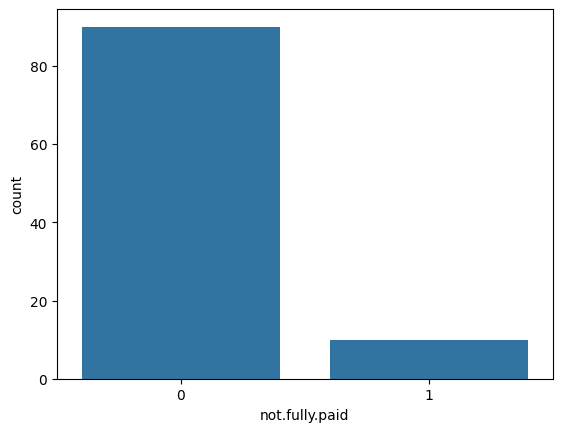

In [10]:
sns.countplot(x='not.fully.paid', data=df)
plt.show()

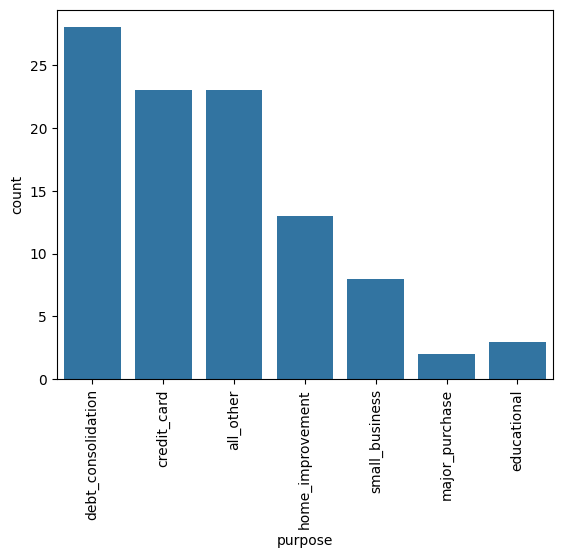

In [11]:
sns.countplot(x="purpose", data=df)
plt.xticks(rotation=90)
plt.show()

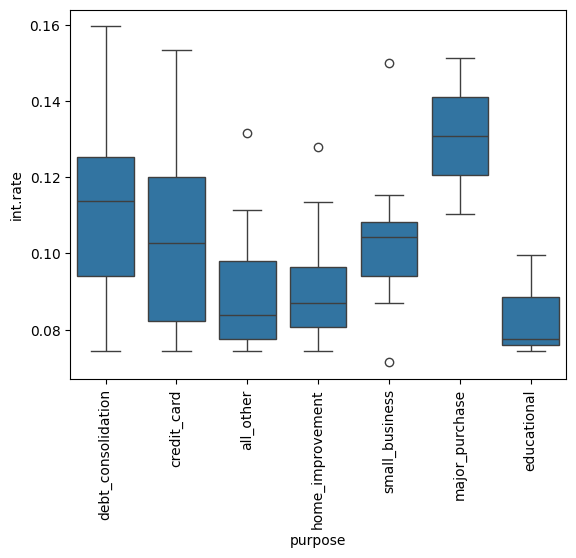

In [13]:
sns.boxplot(x="purpose", y="int.rate", data=df)
plt.xticks(rotation=90)
plt.show()

# **Feature Engineering**

In [14]:
# Perform feature engineering
df["installment_to_income_ratio"] = (
    df["installment"] / df["log.annual.inc"]
)
df["credit_history"] = (df["delinq.2yrs"] + df["pub.rec"]) / df[
    "fico"
]

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = df.drop(['credit.policy', 'days.with.cr.line', 'purpose'], axis=1)

# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
df['not.fully.paid'] = le.fit_transform(df['not.fully.paid'])

In [16]:
scaler = StandardScaler()
numerical_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec','credit_history','installment_to_income_ratio']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [17]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

X_resampled, y_resampled = sm.fit_resample(X, y)

df = pd.concat([X_resampled, y_resampled], axis=1)
df['not.fully.paid'].value_counts()

,count
not.fully.paid,
0,90
1,90


# **Model Selection**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Split the dataset into training and testing sets
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit and evaluate decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print("Decision Tree Classifier Accuracy: {:.2f}%".format(dt_score*100))

# Fit and evaluate random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print("Random Forest Classifier Accuracy: {:.2f}%".format(rf_score*100))

# Fit and evaluate logistic regression classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print("Logistic Regression Classifier Accuracy: {:.2f}%".format(lr_score*100))

# Fit and evaluate support vector machine classifier
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print("Support Vector Machine Classifier Accuracy: {:.2f}%".format(svm_score*100))

Decision Tree Classifier Accuracy: 79.63%
Random Forest Classifier Accuracy: 88.89%
Logistic Regression Classifier Accuracy: 83.33%
Support Vector Machine Classifier Accuracy: 81.48%


# **Hyperparameter Tuning**

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the testing set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Random Forest Classifier Evaluation Results:")
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))
print("Best hyperparameters:", best_params)

Random Forest Classifier Evaluation Results:
Accuracy: 83.33%
Precision: 75.00%
Recall: 100.00%
F1 Score: 85.71%
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [20]:
import joblib
# Save the best model to disk
joblib.dump(best_model, 'loan_classifier.joblib')

['loan_classifier.joblib']